In [9]:
# -----------------------(Q No 1)-----------------------


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [10]:
# -----------------------(Q No 2)-----------------------


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9649122807017544
Confusion Matrix:
 [[ 59   4]
 [  2 106]]


In [11]:
# -----------------------(Q No 3)-----------------------

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Better dataset with realistic relation
np.random.seed(42)
study_hours = np.random.randint(1, 10, 200)
attendance = np.random.randint(50, 100, 200)

# Make marks depend on study_hours and attendance
marks = (study_hours * 7) + (attendance * 0.3) + np.random.randint(-10, 10, 200)

data = pd.DataFrame({
    'study_hours': study_hours,
    'attendance': attendance,
    'marks': marks
})

# Pass if marks >= 60
data['result'] = np.where(data['marks'] >= 60, 'Pass', 'Fail')

# Save to CSV
data.to_csv('students_dataset_fixed.csv', index=False)

# Train Random Forest
X = data[['study_hours', 'attendance', 'marks']]
y = data['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Feature Importance:", rf.feature_importances_)




Accuracy: 1.0
Feature Importance: [0.39130516 0.05016472 0.55853012]


Accuracy: 0.987037037037037


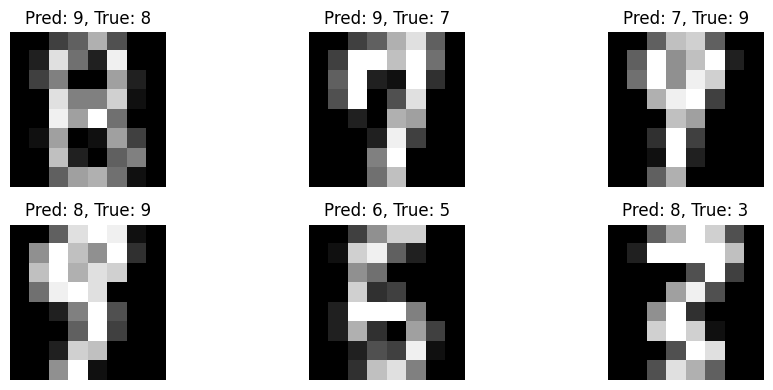

In [ ]:
# -----------------------(Q No 4)-----------------------


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Keep track of original indices
indices = np.arange(len(X))

# Train-test split
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, indices, test_size=0.3, random_state=42
)

# Train SVM model
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Find misclassified samples
misclassified = np.where(y_test != y_pred)[0]

# Plot misclassified images
plt.figure(figsize=(10, 4))
for i, test_idx in enumerate(misclassified[:6]):
    original_idx = idx_test[test_idx]
    plt.subplot(2, 3, i + 1)
    plt.imshow(digits.images[original_idx], cmap='gray')
    plt.title(f"Pred: {y_pred[test_idx]}, True: {y_test[test_idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [13]:
# -----------------------(Q No 5)-----------------------



from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

# SVM model (with fixed random_state)
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm.predict(X_test))

# Print results
print("Random Forest Accuracy:", rf_acc)
print("SVM Accuracy:", svm_acc)

if rf_acc > svm_acc:
    print("✅ Random Forest performs better.")
else:
    print("✅ SVM performs better.")



Random Forest Accuracy: 1.0
SVM Accuracy: 0.7592592592592593
✅ Random Forest performs better.
